# Testing regression model

Model developed using the data from 2017 and 2018 is tested using the data from 2019

#### Import libraries

In [1]:
import pandas as pd # data science library o manipulate data
import numpy as np # mathematical library to manipulate arrays and matrices
import matplotlib.pyplot as plt # visualization library
import seaborn as sb #visualization library specific for data science, based on matplotlib
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

## Data Collection

#### Import 2019 data

In [2]:
df_test = pd.read_csv('testData_2019_Central.csv') # loads a csv file into a dataframe

#### Observing data

In [3]:
df_test

,Date,Central (kWh),temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2019-01-01 00:00:00,121.829,10.635833,62.684167,0.0,0.0,1031.000000,2.543250,0.0,0.0
1,2019-01-01 01:00:00,122.528,10.377500,62.836667,0.0,0.0,1031.000000,1.728667,0.0,0.0
2,2019-01-01 02:00:00,121.191,10.260833,61.720000,0.0,0.0,1031.083333,2.674750,0.0,0.0
3,2019-01-01 03:00:00,120.859,9.666667,63.893333,0.0,0.0,1031.083333,2.444250,0.0,0.0
4,2019-01-01 04:00:00,120.500,8.640833,68.034167,0.0,0.0,1031.000000,3.056333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2410,2019-04-11 11:00:00,221.531,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0
2411,2019-04-11 12:00:00,218.545,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0
2412,2019-04-11 13:00:00,221.306,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0
2413,2019-04-11 14:00:00,232.824,15.755455,45.820909,0.0,0.0,1021.090909,625.072727,0.0,0.0


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2415 non-null   object 
 1   Central (kWh)  2415 non-null   float64
 2   temp_C         2415 non-null   float64
 3   HR             2415 non-null   float64
 4   windSpeed_m/s  2415 non-null   float64
 5   windGust_m/s   2415 non-null   float64
 6   pres_mbar      2415 non-null   float64
 7   solarRad_W/m2  2415 non-null   float64
 8   rain_mm/h      2415 non-null   float64
 9   rain_day       2415 non-null   float64
dtypes: float64(9), object(1)
memory usage: 188.8+ KB


There seems to be no null values in the data.

## Data Preparation

#### Changing Date column into Datetime, renaming the header and adding additional features

In [5]:
df_test.rename(columns = {'Date': 'date'}, inplace = True)

In [6]:
df_test.rename(columns = {'Central (kWh)': 'Power_kW'}, inplace = True)

In [7]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test = df_test.set_index ('date', drop = True)
df_test['Hour'] = df_test.index.hour
df_test['Week Day'] = df_test.index.weekday
df_test['Power-1']=df_test['Power_kW'].shift(1) # Previous hour consumption
df_test['Week-Day^2']=np.square(df_test['Week Day'])

df_test

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Hour,Week Day,Power-1,Week-Day^2
date,,,,,,,,,,,,,
2019-01-01 00:00:00,121.829,10.635833,62.684167,0.0,0.0,1031.000000,2.543250,0.0,0.0,0,1,NaN,1
2019-01-01 01:00:00,122.528,10.377500,62.836667,0.0,0.0,1031.000000,1.728667,0.0,0.0,1,1,121.829,1
2019-01-01 02:00:00,121.191,10.260833,61.720000,0.0,0.0,1031.083333,2.674750,0.0,0.0,2,1,122.528,1
2019-01-01 03:00:00,120.859,9.666667,63.893333,0.0,0.0,1031.083333,2.444250,0.0,0.0,3,1,121.191,1
2019-01-01 04:00:00,120.500,8.640833,68.034167,0.0,0.0,1031.000000,3.056333,0.0,0.0,4,1,120.859,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-11 11:00:00,221.531,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0,11,3,218.149,9
2019-04-11 12:00:00,218.545,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0,12,3,221.531,9
2019-04-11 13:00:00,221.306,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0,13,3,218.545,9


In [8]:
df_test=df_test.dropna()
df_final=df_test.iloc[:, [0,11,1,6,9,12]] # Change the position of the columns so that Y=column 0 and X all the remaining columns
df_final
df_final.to_csv('IST_Central_DataHourly_2019_test.csv', encoding='utf-8', index=True)

## Test model 

Features selected: power-1, temp_c, solar rad, hour and Week-Day^2

Selected Model: Random Forest model

In [9]:
#Create matrix from data frame
Z=df_final.values
#Identify output Y
Y=Z[:,0]
#Identify input Y
X=Z[:,[1,2,3,4,5]] #power-1, temp_C, solar rad, hour, Week-Day^2

In [10]:
import pickle

In [11]:
#Load LR model
with open('RF_model.pkl','rb') as file:
    RF_model=pickle.load(file)

In [12]:
y_pred_RF = RF_model.predict(X)

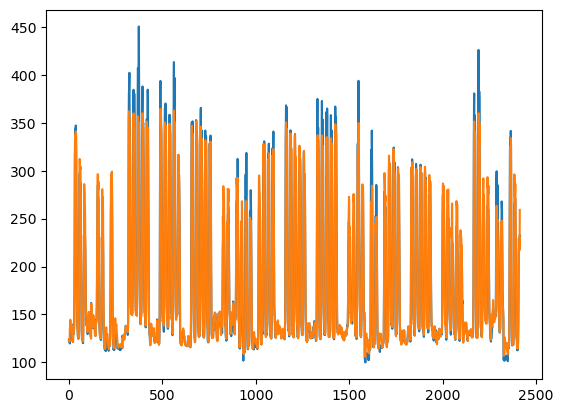

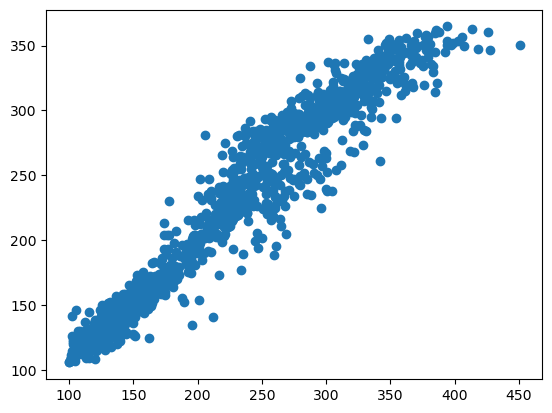

In [13]:
plt.plot(Y)
plt.plot(y_pred_RF)
plt.show()
plt.scatter(Y,y_pred_RF)

In [14]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(Y,y_pred_RF) 
MBE_RF=np.mean(Y-y_pred_RF) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(Y,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(Y,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(Y)
NMBE_RF=MBE_RF/np.mean(Y)
print(MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF)
result = pd.DataFrame({
    'MAE': [MAE_RF],
    'MBE': [MBE_RF],
    'MSE': [MSE_RF],
    'RMSE': [RMSE_RF],
    'cvRMSE': [cvRMSE_RF],
    'NMBE': [NMBE_RF]
},index=['Random Forest'])
result.index.name = 'REGRESSION METHOD' 
result

8.688955679321623 -0.013565948516761312 214.14526382462205 14.63370301135779 0.08073172140018688 -7.484109629219775e-05


,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Random Forest,8.688956,-0.013566,214.145264,14.633703,0.080732,-0.000075


# Conclusion 

The model sussessfully forecasted the power consumption according the the ASHRAE and IPMVP standards